<h3><a href= "https://doi.org/10.24432/C5Z89R" style= font-decoration: Underline>Dataset Used</a></h3>

In [4]:
import pandas as pd

df= pd.read_csv("heart_failure_clinical_records.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [5]:
df.shape

(5000, 13)

In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

In [7]:
df['death_event'].value_counts()

death_event
0    3432
1    1568
Name: count, dtype: int64

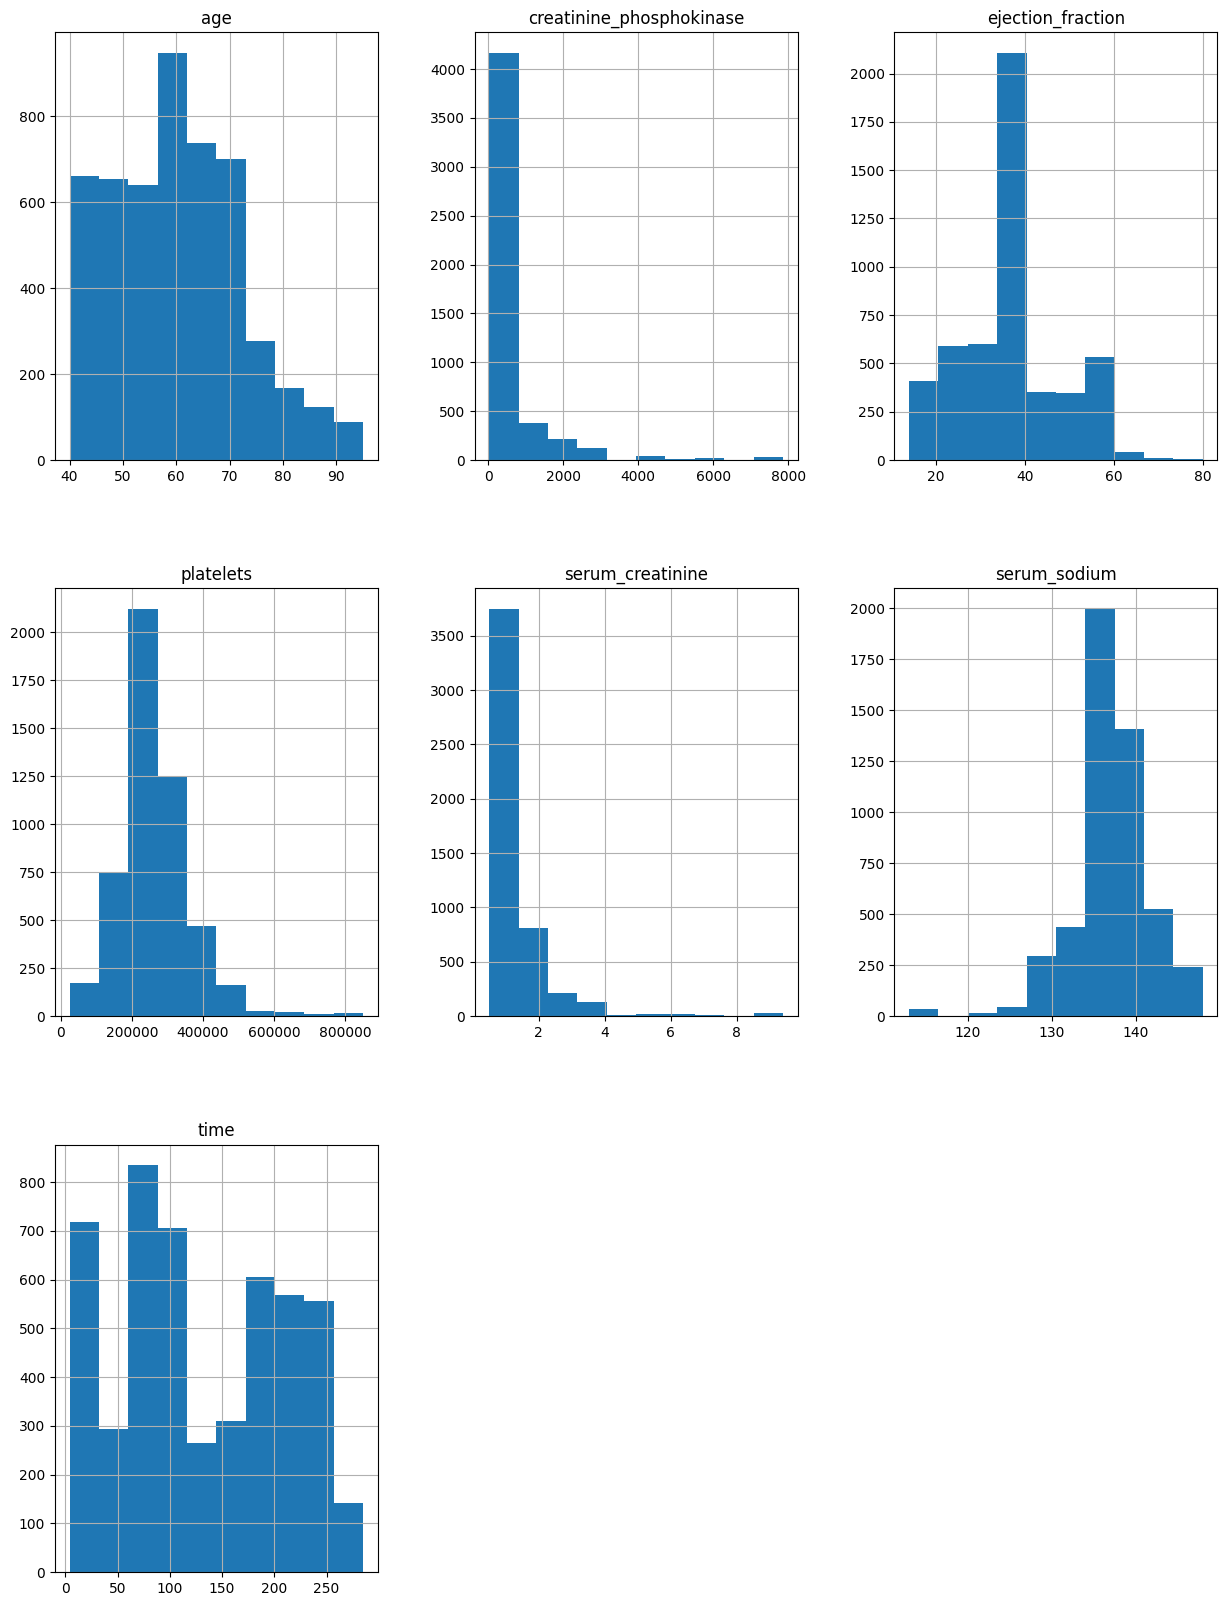

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

arr =['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
df[arr].hist(figsize= (15, 20))
plt.show()

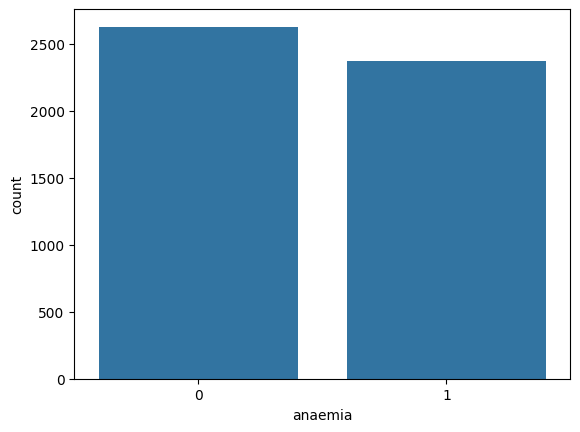

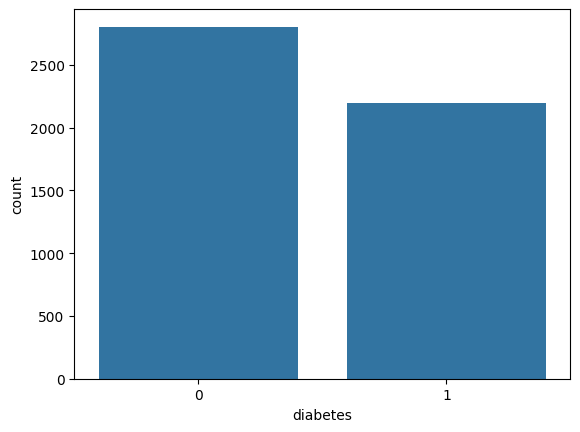

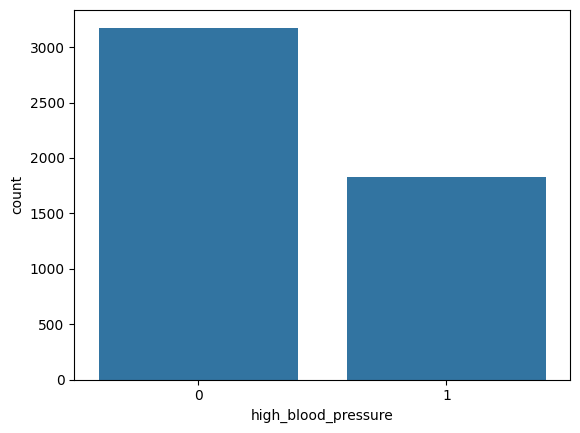

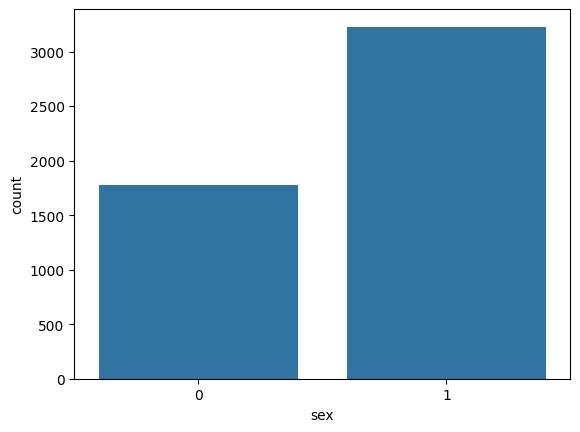

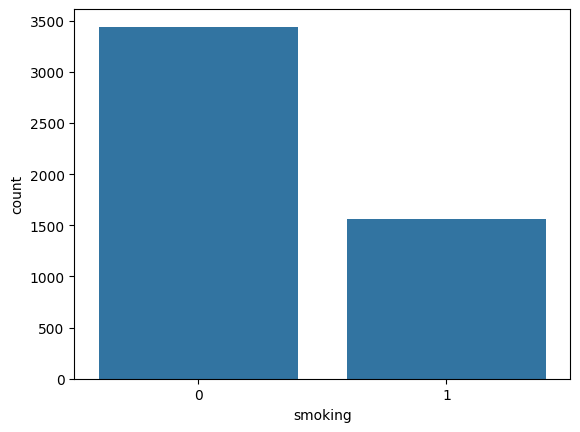

In [9]:
arr= ['anaemia','diabetes','high_blood_pressure','sex','smoking']
for feature in arr:
    sns.countplot(x= feature, data= df)
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X= df.drop("death_event", axis= 1)
y= df['death_event']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

In [12]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
X_train_scale= ss.fit_transform(X_train)
X_test_scale= ss.fit_transform(X_test)

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

model= GaussianNB()
model.fit(X_train_scale, y_train)

y_pred= model.predict(X_test_scale)
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       881
           1       0.72      0.52      0.61       369

    accuracy                           0.80      1250
   macro avg       0.77      0.72      0.74      1250
weighted avg       0.79      0.80      0.79      1250



In [14]:
from sklearn.metrics import roc_curve, auc

prob= model.predict_proba(X_test_scale)[:, 1]
fpr, tpr, threshold= roc_curve(y_test, prob)
area= auc(fpr, tpr)
area

0.8707430888156782

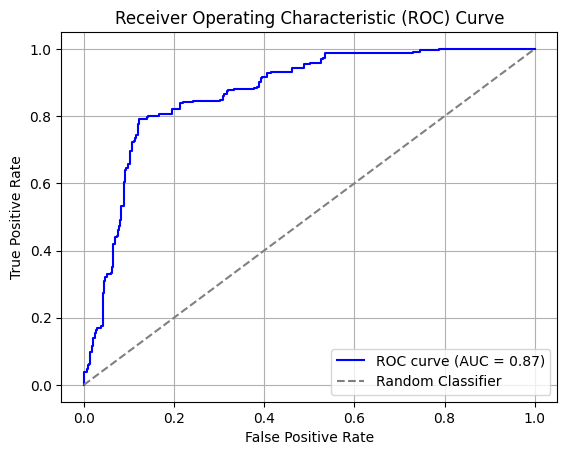

In [16]:
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {area:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [29]:
import numpy as np

desired_recall= 0.85

idx = np.argmin(abs(tpr- desired_recall))
idx

np.int64(205)

In [30]:
threshold[205]

np.float64(0.0930720650358236)

In [31]:
fpr[205]

np.float64(0.30192962542565266)

In [32]:
tpr[205]

np.float64(0.8482384823848238)

In [33]:
y_score = model.predict_proba(X_test_scale)[:, 1]
y_pred = (y_score > 0.0930720650358236).astype(int)

report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.70      0.79       881
           1       0.54      0.85      0.66       369

    accuracy                           0.74      1250
   macro avg       0.73      0.77      0.73      1250
weighted avg       0.80      0.74      0.75      1250



<h3>SVM Model</h3>

In [70]:
from sklearn.svm import SVC

model= SVC(probability= True, kernel= "linear")
model.fit(X_train_scale, y_train)

y_pred= model.predict(X_test_scale)
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       881
           1       0.74      0.76      0.75       369

    accuracy                           0.85      1250
   macro avg       0.82      0.83      0.82      1250
weighted avg       0.85      0.85      0.85      1250



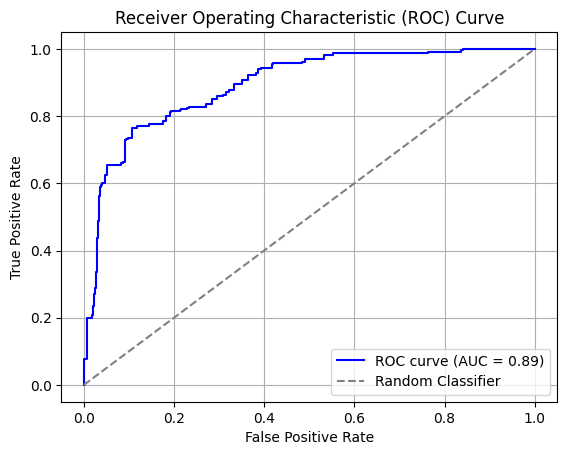

In [71]:
prob_svc= model.predict_proba(X_test_scale)[:, 1]

fpr_svc, tpr_svc, threshold_svc= roc_curve(y_test, prob_svc)
area_svc= auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, color='blue', label=f'ROC curve (AUC = {area_svc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [72]:
area_svc= auc(fpr_svc, tpr_svc)
area_svc

0.8929800762252798

In [73]:
desired_recall= 0.90

idx= np.argmin(abs(tpr_svc- desired_recall))
idx

np.int64(243)

In [74]:
fpr_svc[243]

np.float64(0.3518728717366629)

In [75]:
tpr_svc[243]

np.float64(0.8970189701897019)

In [76]:
threshold_svc[243]

np.float64(0.1756525849008379)

In [77]:
y_pred = (prob_svc > 0.18017716325836705).astype(int)

report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.67      0.78       881
           1       0.53      0.89      0.67       369

    accuracy                           0.73      1250
   macro avg       0.73      0.78      0.72      1250
weighted avg       0.82      0.73      0.75      1250



<h3>XGBoost</h3>

In [78]:
from xgboost import XGBClassifier

model= XGBClassifier()
model.fit(X_train_scale, y_train)

y_pred= model.predict(X_test_scale)
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       881
           1       0.92      0.93      0.92       369

    accuracy                           0.95      1250
   macro avg       0.94      0.95      0.95      1250
weighted avg       0.95      0.95      0.95      1250



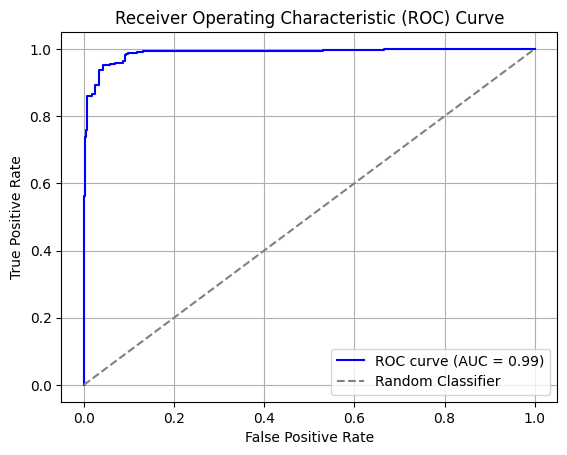

In [79]:
prob_xgb= model.predict_proba(X_test_scale)[:, 1]

fpr_xgb, tpr_xgb, threshold_xgb= roc_curve(y_test, prob_xgb)
area_xgb= auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'ROC curve (AUC = {area_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

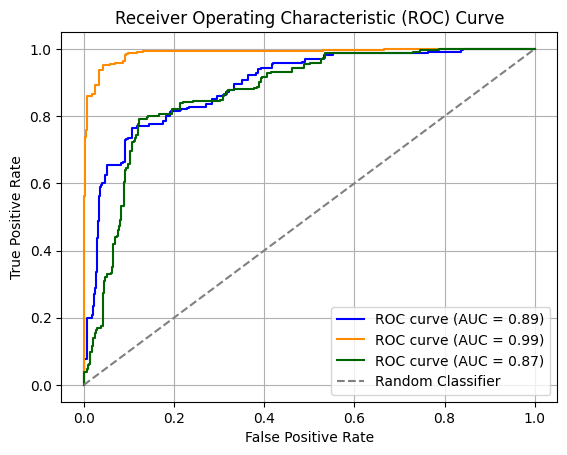

In [80]:
plt.plot(fpr_svc, tpr_svc, color='blue', label=f'ROC curve (AUC = {area_svc:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', label=f'ROC curve (AUC = {area_xgb:.2f})')
plt.plot(fpr, tpr, color='darkgreen', label=f'ROC curve (AUC = {area:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()